c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6280 - loss: 0.6663 - val_accuracy: 0.6454 - val_loss: 0.6515
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6485 - loss: 0.6491 - val_accuracy: 0.6454 - val_loss: 0.6497
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6225 - loss: 0.6646 - val_accuracy: 0.6454 - val_loss: 0.6495
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6344 - loss: 0.6590 - val_accuracy: 0.6454 - val_loss: 0.6493
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6295 - loss: 0.6622 - val_accuracy: 0.6454 - val_loss: 0.6491
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6403 - loss: 0.6518 - val_accuracy: 0.6454 - val_loss: 0.6490
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6376 - loss: 0.6566 - val_accuracy: 0.6454 - val_loss: 0.6510
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6435 - loss: 0.6521 - val_accuracy: 0.

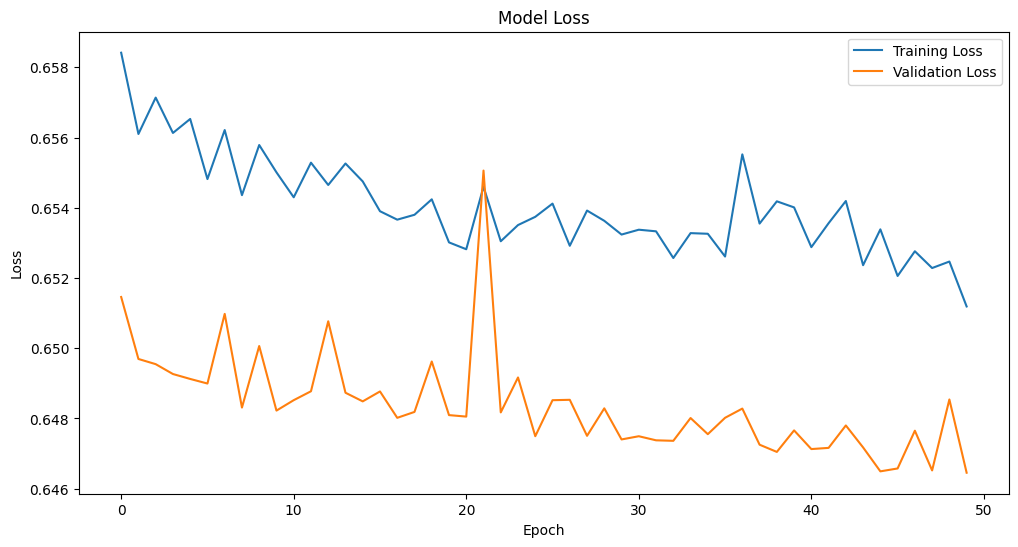

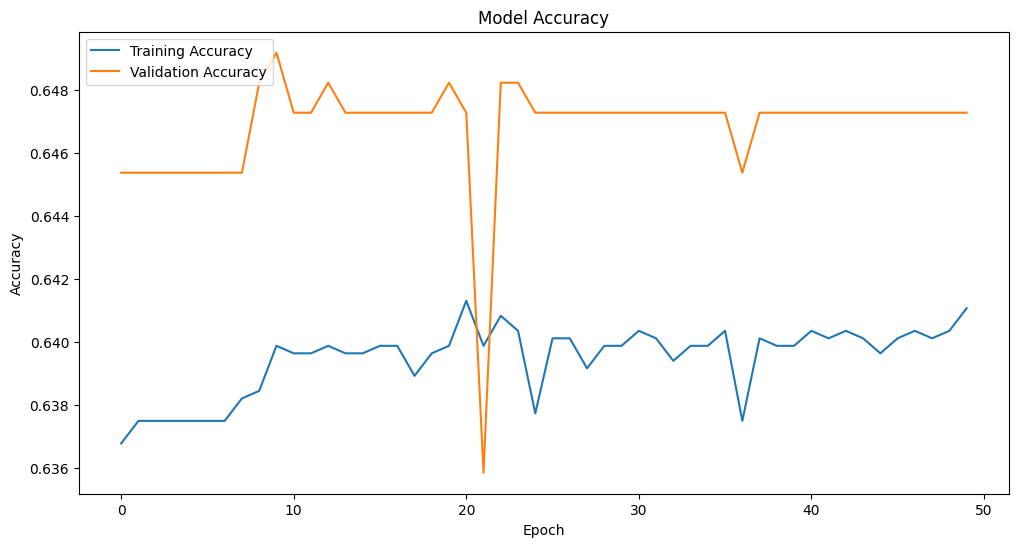

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to create windows of data
def create_windows(data, target, window_size):
    Xs, ys = [], []
    for i in range(len(data) - window_size):
        Xs.append(data[i:i + window_size])
        ys.append(target[i + window_size])
    return np.array(Xs), np.array(ys)

# Load and preprocess data
df = pd.read_csv(r"D:\folders\casino\histtt.txt", sep=";")
df['amount players'] = df['amount players'].astype(float)
df['round result'] = df['round result'].astype(float)
df['MO'] = df['MO'].astype(float)
df['bank'] = df['bank'].astype(float)
df['timee'] = pd.to_datetime(df['timee'], unit='s')
df['hour'] = df['timee'].dt.hour
df['day_of_week'] = df['timee'].dt.dayofweek
df['day_of_month'] = df['timee'].dt.day
df['month'] = df['timee'].dt.month
df['year'] = df['timee'].dt.year
df['wkday'] = df['wkday'].astype(int)
df['coeff'] = df['coeff'].astype(float)
df['target'] = (df['coeff'].shift(-1) > 1.20).astype(int)
df.dropna(inplace=True)

X = df[['amount players', 'round result', 'MO', 'bank', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'wkday']].values
y = df['target'].values

scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

window_size = 10
X_windows, y_windows = create_windows(X_scaled, y, window_size)

X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Accuracy: {accuracy}')

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print the first 10 predictions
for i in range(10):
    print(f'Original: {y_test[i]}, Predicted: {y_pred[i]}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'D:\folders\casino\hist.txt', sep=";", header=None)

# Data Preprocessing
df['timee'] = pd.to_datetime(df['timee'], unit='s')
df['hour'] = df['timee'].dt.hour
df['day_of_week'] = df['timee'].dt.dayofweek
df['day_of_month'] = df['timee'].dt.day
df['month'] = df['timee'].dt.month
df['year'] = df['timee'].dt.year

# Drop the original 'timee' column
df = df.drop(columns=['timee'])

# Convert to float
for column in df.columns:
    df[column] = df[column].astype(float)

# Define X and y
X = df[['amount_players', 'round_result', 'MO', 'bank', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'wkday']].values
y = df['coeff'].values

# Scale the data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Create windows for LSTM
def create_windows(data, target, window_size):
    Xs, ys = [], []
    for i in range(len(data) - window_size):
        Xs.append(data[i:i + window_size])
        ys.append(target[i + window_size])
    return np.array(Xs), np.array(ys)

window_size = 10
X_windows, y_windows = create_windows(X_scaled, y_scaled, window_size)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Callbacks
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint, early_stop])

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}, Test MSE: {mse}')

# Predict and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Print some predictions
for i in range(10):
    print(f'Original: {y_test_original[i]}, Predicted: {y_pred[i]}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.show()


KeyError: 'timee'

In [8]:
import pandas as pd

# Загрузка данных в DataFrame
file_path = r'F:\folders\casino\histtt.txt'
data = pd.read_csv(file_path, delimiter=';')

# Вывод первых нескольких строк для проверки
print(data.head())


   amount players  round result     MO    bank         timee  wkday  coeff
0            23.0        -20.71  0.000   50.35  1.716209e+09      1   3.00
1            18.0         52.97  3.000  117.89  1.716209e+09      1   1.11
2            18.0         52.02  2.050  129.88  1.716209e+09      1   1.56
3            22.0        -35.86  1.900   71.50  1.716209e+09      1   3.00
4            18.0        176.21  2.175  176.21  1.716209e+09      1   1.02


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Шаг 1: Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('coeff', axis=1)
y = data['coeff']

# Шаг 2: Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 3: Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 4: Построение и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Шаг 5: Оценка модели
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 933.2371890156888
R-squared: 0.011787822277779636


coeff             1.000000
timee             0.060735
bank              0.045800
wkday             0.024173
amount players    0.011804
MO               -0.006377
round result     -0.049347
Name: coeff, dtype: float64


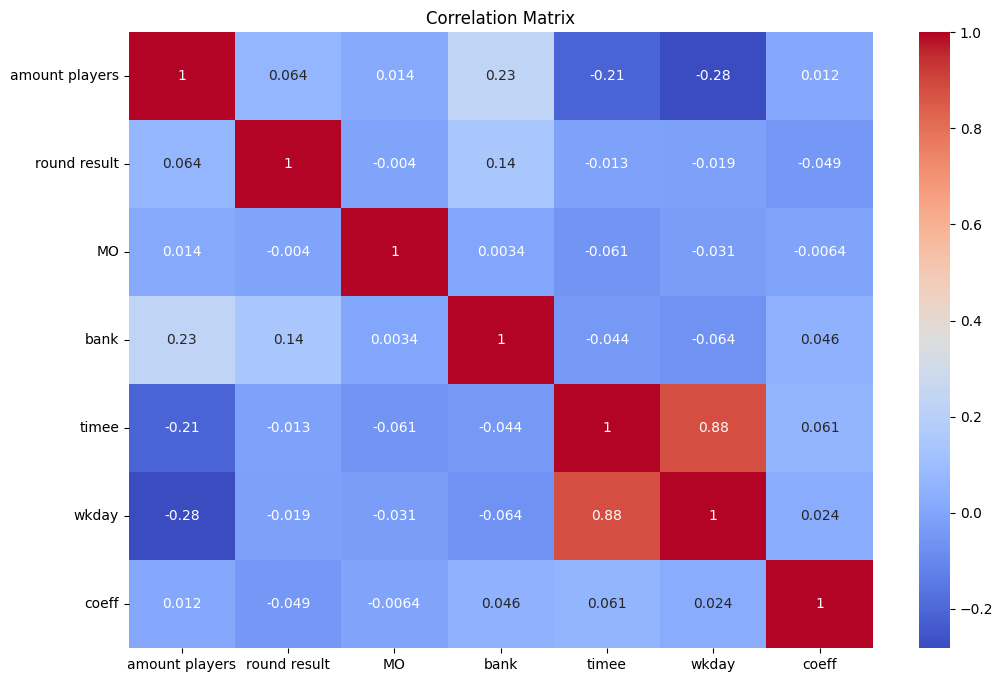

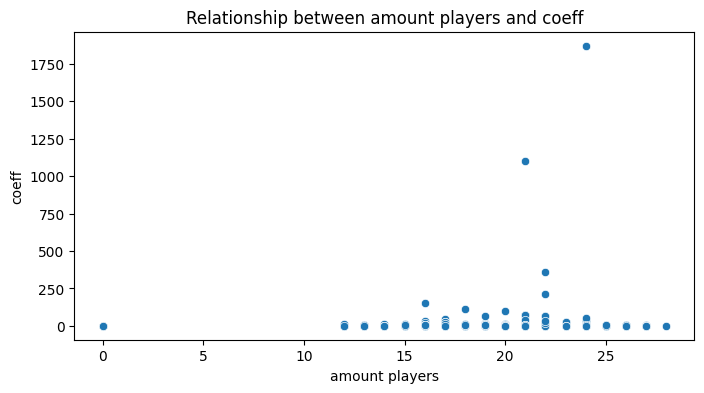

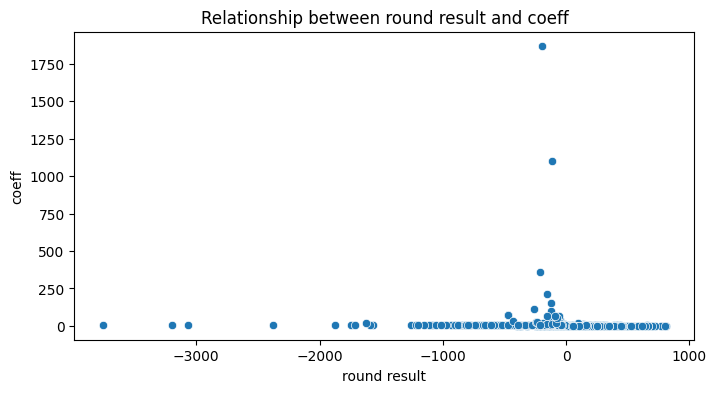

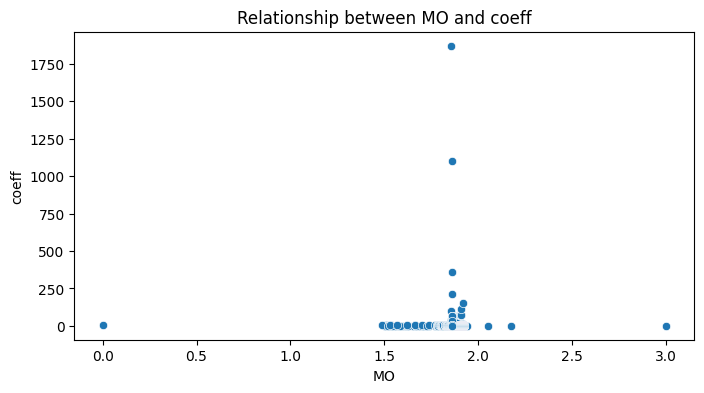

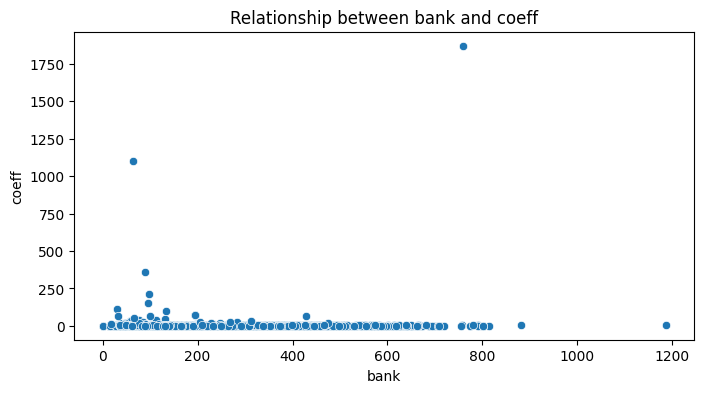

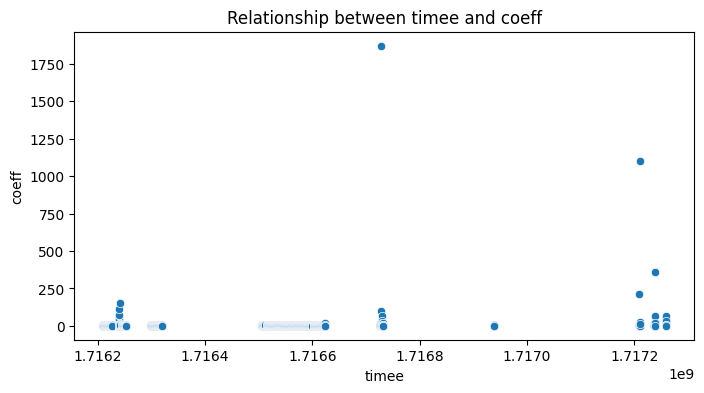

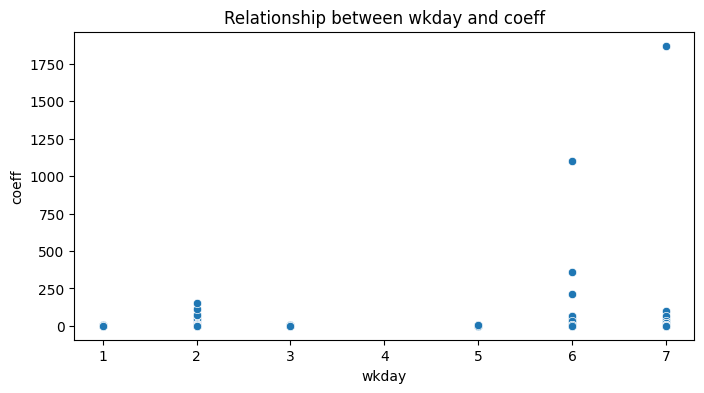

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ корреляции
corr_matrix = data.corr()
print(corr_matrix['coeff'].sort_values(ascending=False))

# Визуализация данных
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Распределение признаков и их взаимосвязь с целевой переменной
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=data, x=column, y='coeff')
    plt.title(f'Relationship between {column} and coeff')
    plt.show()


In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")


NameError: name 'X_train_scaled' is not defined